In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [28]:
df=pd.read_csv("weatherHistory.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            1326 non-null   object 
 1   Summary                   1326 non-null   object 
 2   Precip Type               1029 non-null   object 
 3   Temperature (C)           1326 non-null   float64
 4   Apparent Temperature (C)  1326 non-null   float64
 5   Humidity                  1326 non-null   float64
 6   Wind Speed (km/h)         1326 non-null   float64
 7   Wind Bearing (degrees)    1326 non-null   int64  
 8   Visibility (km)           1326 non-null   float64
 9   Loud Cover                1326 non-null   int64  
 10  Pressure (millibars)      1326 non-null   float64
 11  Daily Summary             1326 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 124.4+ KB


In [30]:
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2016-10-14 19:00:00.000 +0200  Mostly Cloudy         NaN        10.883333   
1  2016-10-14 20:00:00.000 +0200  Mostly Cloudy         NaN        10.000000   
2  2016-10-14 21:00:00.000 +0200  Mostly Cloudy         NaN         9.761111   
3  2016-10-14 22:00:00.000 +0200  Mostly Cloudy         NaN         9.672222   
4  2016-10-14 23:00:00.000 +0200  Mostly Cloudy         NaN         9.400000   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                 10.883333      0.72            12.1716   
1                  8.338889      0.76            11.9140   
2                  8.077778      0.77            11.7530   
3                  7.944444      0.75            11.8979   
4                  7.466667      0.77            12.9605   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                      80          16.1000           0               1020.97  

In [32]:
df.isna().sum()
df.shape

(1326, 12)

In [35]:
weather = df.copy()
weather = df.drop(['Formatted Date', 'Temperature (C)', 'Loud Cover', 'Daily Summary'], axis = 1)
weather.sample(5)

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
376,Overcast,NaN,11.511111,0.73,18.4184,299,0.0000,1027.91
1321,Partly Cloudy,rain,26.016667,0.43,10.9963,31,16.1000,1014.36
879,Partly Cloudy,rain,22.666667,0.52,0.1449,40,16.1000,1019.73
78,Mostly Cloudy,NaN,5.211111,0.75,18.3540,142,16.1000,1028.48
1030,Mostly Cloudy,rain,19.994444,0.49,10.6421,2,15.8263,1020.13


In [36]:
weather.columns

Index(['Summary', 'Precip Type', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [37]:
weather.isnull().sum()

Summary                       0
Precip Type                 297
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [38]:
weather = weather.dropna()
weather.isnull().sum()

Summary                     0
Precip Type                 0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Count'>

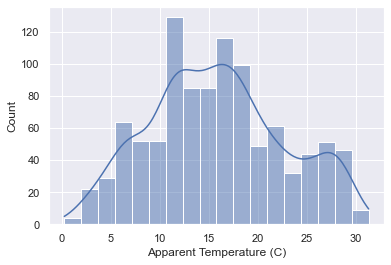

In [39]:
sns.histplot(weather['Apparent Temperature (C)'], kde = True)

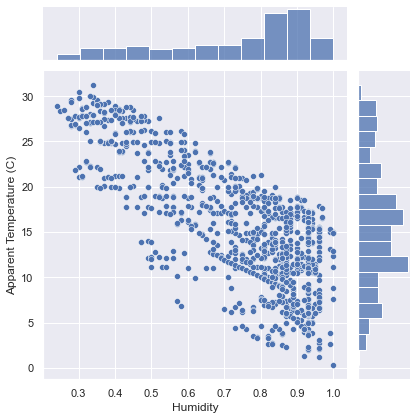

In [45]:
sns.jointplot(weather['Humidity'], weather['Apparent Temperature (C)'])

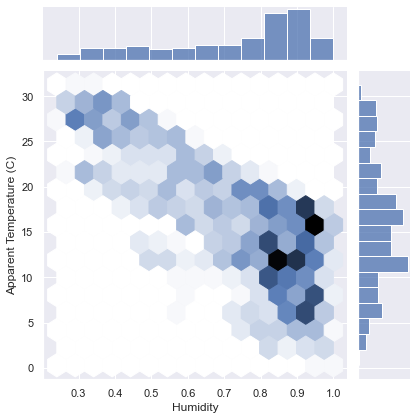

In [46]:
sns.jointplot(weather['Humidity'], weather['Apparent Temperature (C)'], kind="hex")

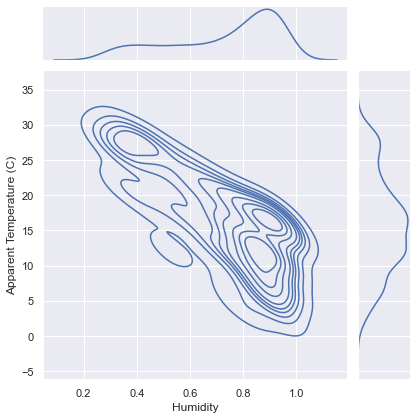

In [47]:
sns.jointplot(weather['Humidity'], weather['Apparent Temperature (C)'], kind="kde")

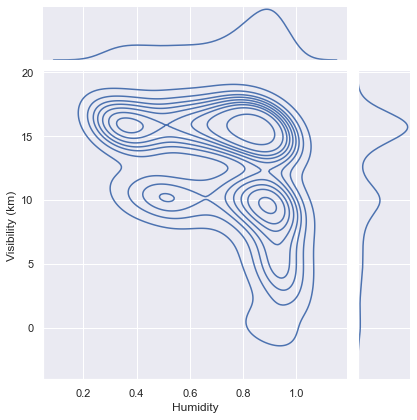

In [50]:
sns.jointplot(weather['Humidity'], weather['Visibility (km)'], kind="kde")

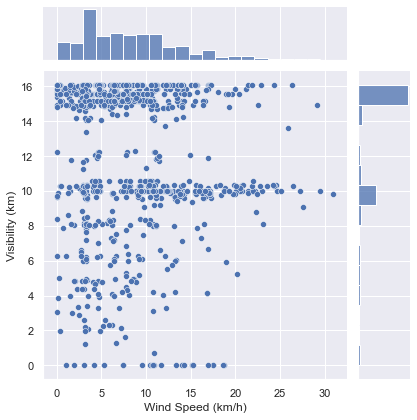

In [51]:
sns.jointplot(weather['Wind Speed (km/h)'], weather['Visibility (km)'])

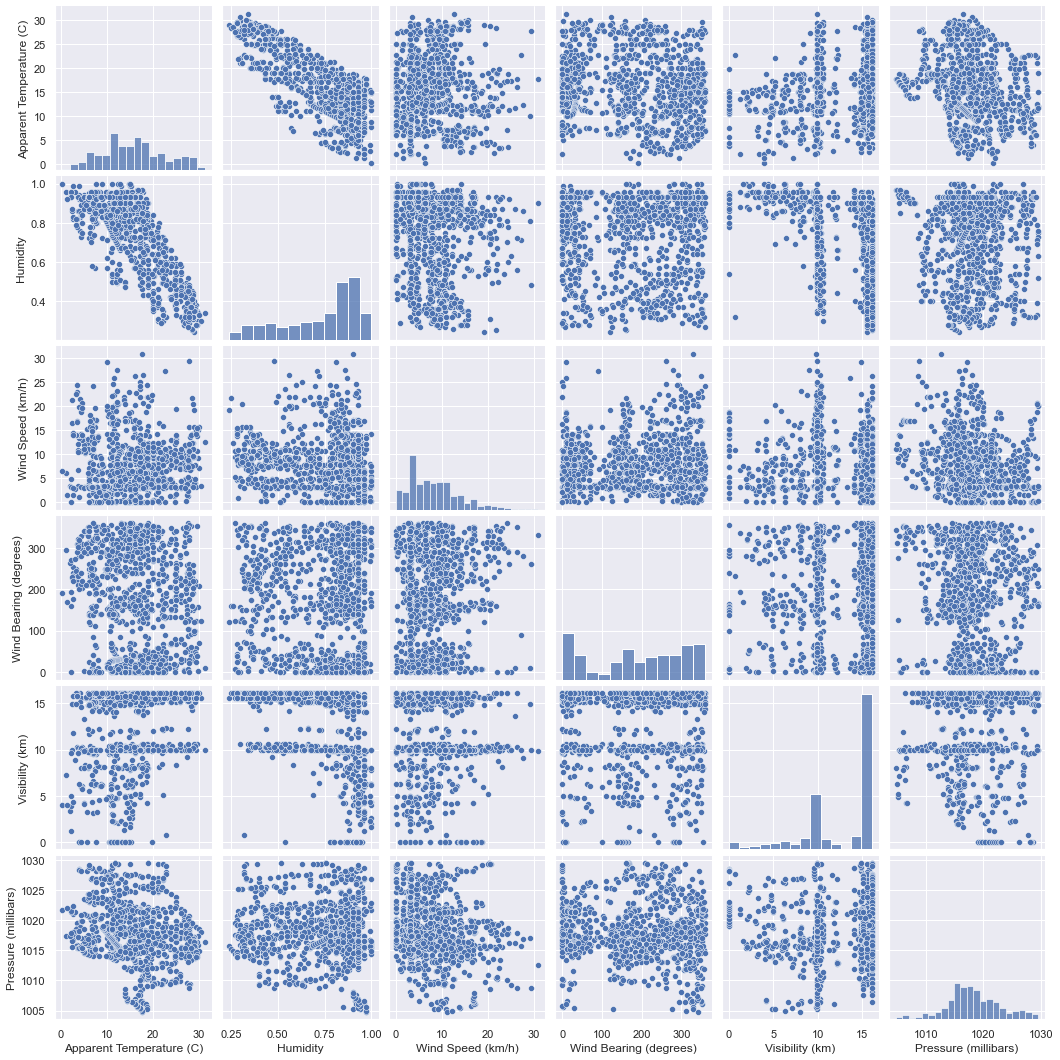

In [77]:
sns.pairplot(weather)

In [67]:
X = weather[['Wind Speed (km/h)', 'Humidity']]

In [53]:
y= weather['Visibility (km)']

In [68]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.linear_model import LinearRegression

In [80]:
reg = LinearRegression()